In [23]:
import matplotlib.pyplot as plt

In [ ]:
datetime.timedelta

In [3]:
import numpy as np
import rasterio as rs
import datetime

In [4]:
date = datetime.datetime.strptime('1979-01-02','%Y-%m-%d')

In [16]:
# preallocate
T = np.zeros((24,224,464),dtype=np.float32)
T[:] = np.NaN
P = T.copy()

In [44]:
# for date in dates:
outfl = './data/NLDASv2_TP_daily/LDAS_FORA0125_H.A%s.002.grb.TP.tiff'%(date.strftime('%Y%m%d'))
for hr in range(0,24): # create daily data cube.
    fl = './data/NLDASv2/NLDAS_FORA0125_H.A%s.%s00.002.grb.TP.tiff'%(date.strftime('%Y%m%d'),str(hr).zfill(2))
    #print(fl)
    with rs.open(fl) as ds:
        T[hr,:,:] = ds.read(1)
        P[hr,:,:] = ds.read(2)
        if hr == 23:
            profile = ds.profile
            noData = ds.nodata
            
profile.update({'compress':'LZW',
            'profile':'GeoTIFF',
            'tiled':True,
            'sparse_ok':True,
            'num_threads':'ALL_CPUS',
               'nodata':9999,
               'dtype':'float32',
               'count':4})

T[T==noData] = np.NaN
P[P==noData] = np.NaN

Tmin = np.nanmin(T,axis=0)
Tmax = np.nanmax(T,axis=0)
Tave = np.nanmean(T,axis=0)
Ptot = np.nansum(P,axis=0)

with rs.open(outfl,'w',**profile) as dst:
    dst.write(Tmin,1)
    dst.write(Tmax,2)
    dst.write(Tave,3)
    dst.write(Ptot,4)

/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: All-NaN slice encountered
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: All-NaN slice encountered
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [43]:
profile

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': 9999,
 'width': 464,
 'height': 224,
 'count': 2,
 'crs': CRS({'proj': 'longlat', 'a': 6371200, 'b': 6371200, 'no_defs': True, 'wktext': True}),
 'transform': (-125.0005, 0.125, 0.0, 53.0005, 0.0, -0.12500000000000003),
 'affine': Affine(0.125, 0.0, -125.0005,
        0.0, -0.12500000000000003, 53.0005),
 'tiled': True,
 'interleave': 'pixel',
 'compress': 'LZW',
 'profile': 'GeoTIFF',
 'sparse_ok': True,
 'num_threads': 'ALL_CPUS'}

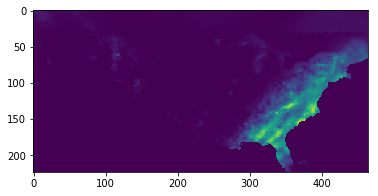

In [39]:
plt.imshow(Ptot)

In [13]:
ds = rs.open('./data/NLDASv2/NLDAS_FORA0125_H.A19790102.0000.002.grb.TP.tiff')
dat = ds.read(1)

In [14]:
dat.shape

(224, 464)

In [6]:
date.strftime('%Y%m%d')

'19790102'

In [8]:
hr = str(1)

In [10]:
hr.zfill(2)

'01'